# LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load

In [2]:
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
'''
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)
'''

'\nyc_train = np.load("yc_train.npy", allow_pickle=True)\nyc_test = np.load("yc_test.npy", allow_pickle=True)\n'

In [3]:
#Parameters

LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50


input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [4]:
def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(2048))
    model.add(Dropout(0.5))
    model.add(Dense(2048))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

Epoch 1/50
5/5 - 1s - loss: 1.9195 - val_loss: 0.3123
Epoch 2/50
5/5 - 0s - loss: 0.5345 - val_loss: 0.4491
Epoch 3/50
5/5 - 0s - loss: 0.1448 - val_loss: 0.1438
Epoch 4/50
5/5 - 0s - loss: 0.3245 - val_loss: 0.3315
Epoch 5/50
5/5 - 0s - loss: 0.1722 - val_loss: 0.0400
Epoch 6/50
5/5 - 0s - loss: 0.1097 - val_loss: 0.0366
Epoch 7/50
5/5 - 0s - loss: 0.0644 - val_loss: 0.1611
Epoch 8/50
5/5 - 0s - loss: 0.0565 - val_loss: 0.0738
Epoch 9/50
5/5 - 0s - loss: 0.0341 - val_loss: 0.0477
Epoch 10/50
5/5 - 0s - loss: 0.0427 - val_loss: 0.0985
Epoch 11/50
5/5 - 0s - loss: 0.0342 - val_loss: 0.0873
Epoch 12/50
5/5 - 0s - loss: 0.0262 - val_loss: 0.0586
Epoch 13/50
5/5 - 0s - loss: 0.0341 - val_loss: 0.0816
Epoch 14/50
5/5 - 0s - loss: 0.0305 - val_loss: 0.0847
Epoch 15/50
5/5 - 0s - loss: 0.0268 - val_loss: 0.0646
Epoch 16/50
5/5 - 0s - loss: 0.0306 - val_loss: 0.0778
Epoch 17/50
5/5 - 0s - loss: 0.0283 - val_loss: 0.0752
Epoch 18/50
5/5 - 0s - loss: 0.0276 - val_loss: 0.0704
Epoch 19/50
5/5 - 0

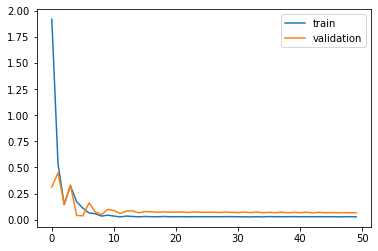

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               133120    
_________________________________________________________________
dense (Dense)                (None, 2048)              526336    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 4,857,857
Trainable params: 4,857,857
Non-trainable params: 0
_________________________________________________________________
None
0.2569619088775846


In [5]:
model = basic_lstm(input_dim, feature_size)
model.save('LSTM_30to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

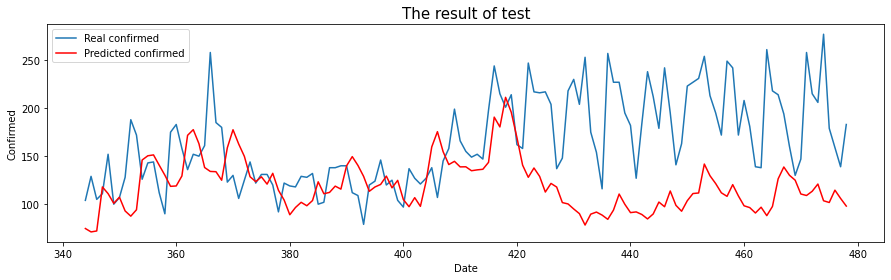

-- RMSE --  70.92148747839786
-- MAE -- 54.95260898139742


<Figure size 432x288 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error, mean_absolute_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('LSTM_30to1.h5')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    #drop 2020
    # Input_Before = '2020-01-01'
    # predict_result = predict_result.loc[predict_result.index < Input_Before]
    # real_price = real_price.loc[real_price.index < Input_Before]

    # Plot the predicted result
    plt.figure(figsize=(15, 4))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Confirmed")
    plt.legend(("Real confirmed", "Predicted confirmed"), loc="upper left", fontsize=10)
    plt.title("The result of test", fontsize=15)
    plt.show()
    
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    MAE = mean_absolute_error(predicted, real)
    # accuracy = accuracy_score(predicted, real)
    print('-- RMSE -- ', RMSE)
    print('-- MAE --', MAE)
    #print('-- accuracy --', accuracy)

    return predict_result, RMSE, MAE


test_predicted, test_RMSE, test_MAE = get_test_plot(X_test, y_test)